Mature estates : 
['Toa Payoh', 'Geylang', 'Queenstown', 'Bukit Merah', 'Clementi', 'Ang Mo Kio', 'Tampines', 'Serangoon', 'Kallang / Whampoa', 'Bedok', 'Bishan', 'Pasir Ris']
Non Mature estates : 
['Hougang', 'Yishun', 'Bukit Panjang', 'Woodlands', 'Bukit Batok', 'Sembawang', 'Choa Chu Kang', 'Punggol', 'Sengkang', 'Jurong East', 'Jurong West']
['Toa Payoh', 'Geylang', 'Queenstown', 'Bukit Merah', 'Clementi', 'Ang Mo Kio', 'Tampines', 'Serangoon', 'Kallang / Whampoa', 'Bedok', 'Bishan', 'Pasir Ris', 'Hougang', 'Yishun', 'Bukit Panjang', 'Woodlands', 'Bukit Batok', 'Sembawang', 'Choa Chu Kang', 'Punggol', 'Sengkang', 'Jurong East', 'Jurong West']


<IPython.core.display.Javascript object>


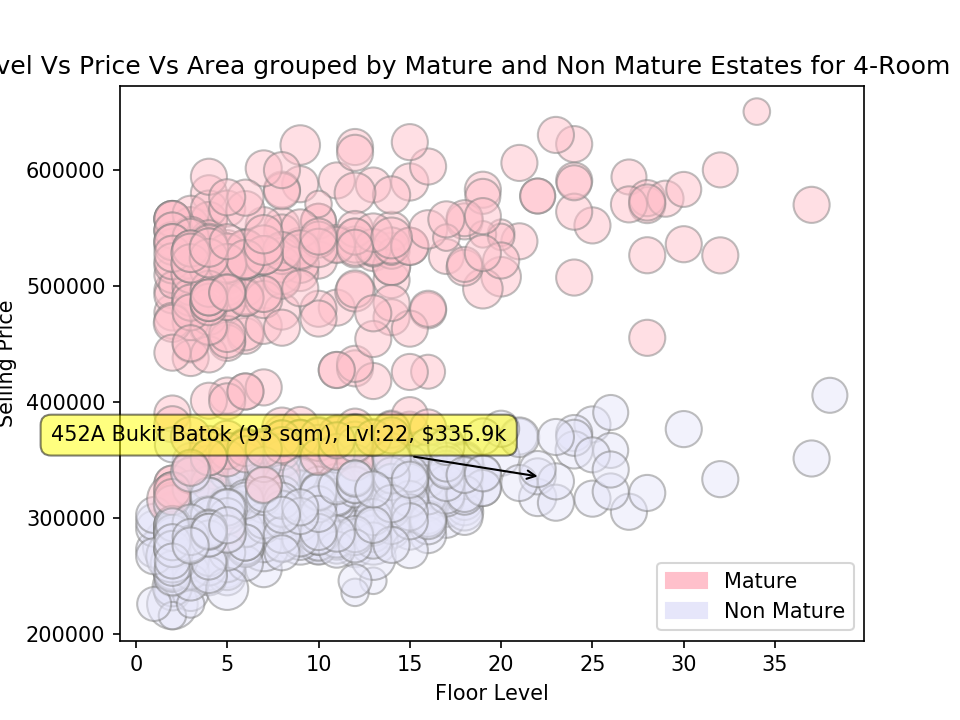

In [9]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import parseUnitDetails
#import mpld3
import mplcursors

# Interactive hover graph to see trend between dist vs price vs area, distinguished by Maturity. 4-Rm Flats

unitDetails = parseUnitDetails.getUnitDetails()




# Get selling prices across towns for 4-Room flats 
# labels for the 22 towns in SBF HDB Nov 2018
labels = np.array(['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun'])
#print(data)
#print(len(data))
#print(len(labels))


# List of the 22 towns for SBF HDB Nov 2018
allTowns = ['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun']



########################################################

## Mature and Non Mature estates pass in csv file
#yMature = estates that are mature
#nMature = estates that are non mature
yMature,nMature,keys,values = parseUnitDetails.getMaturityColour()
##########################################################################
# Making Dictionary for colours and by town
# change fill color
region_color_dict = {
"Mature": "pink",
"Non Mature": "lavender",      
}

town_region_dict= dict(zip(keys,values))  #### dict used this way diff


##############################################################################

# Bubble plot on 4-Room Flats
## Sqm for Mature and Non Mature
town4rm =[] 
price4rm=[]
sqm4=[]
lvl4 =[]

labelKeyList = []
labelStrList = []
sqm =unitDetails['sqm']

for unit in unitDetails:
    if unit['rmType']=='4-Room':
        town4rm.append(unit['town'])
        price4rm.append(unit['sellingPrice'])
        sqm4.append(unit['sqm'])   
        lvl4.append(unit['level'])
        # labelKeyStr may have dupes if more than 1 unit has the same lvl and same selling price
        # display time to check all
        labelKeyStr = "%i_%i" % (unit['level'], unit['sellingPrice'])
        labelStr = "%s %s (%i sqm)" % (unit['blk'], unit['town'], unit['sqm'])
        labelKeyList.append(labelKeyStr)
        labelStrList.append(labelStr)
        
townColouring = [region_color_dict[town_region_dict[town]] for town in town4rm]
#print(len(lvl4),len(price4rm),len(sqm4),len(townColouring))
makeAreaLarger = [np.exp(x/16.3) for x in sqm4]
#print(makeAreaLarger)

fig = plt.figure()
ax = plt.axes()
# Change color with c and alpha. I map the color to the X axis value.
scatter = plt.scatter(lvl4, price4rm, s=makeAreaLarger,c=townColouring, cmap="Blues", alpha=0.5, edgecolors="grey") # should scale size


# Add titles (main and on axis)
plt.xlabel("Floor Level")
plt.ylabel("Selling Price")
plt.title("Level Vs Price Vs Area grouped by Mature and Non Mature Estates for 4-Room Flats")
# Add Labels using mpatches library
pink_patch = mpatches.Patch(color='pink', label='Mature')
lavender_patch = mpatches.Patch(color='lavender', label='Non Mature')
plt.legend(handles=[pink_patch,lavender_patch])



def labelOnHover(sel):
    dataX,dataY = sel.target
    #txtToShow = "%i, %i" % (dataX, dataY)
    labelKeyStr = "%i_%i" % (dataX, dataY)
    countOfKey = labelKeyList.count(labelKeyStr)
    #labelTxt = ''
    
    #for this version, use only the first value
    # TODO: update to reflect all details
    
    keyIdx = labelKeyList.index(labelKeyStr)
    labelTxt = labelStrList[keyIdx]
    
    #txtToShow = "Lvl:%i, $%1.1fk count: %i, label: %s" % (dataX, int(dataY)/1000, countOfKey, labelTxt)
    txtToShow = "%s, Lvl:%i, $%1.1fk" % (labelTxt, dataX, int(dataY)/1000)
    
    sel.annotation.set_text(txtToShow)
    #return('hover lblKeyStr ', labelKeyStr, ' count ', countOfKey)

    
mplcursors.cursor(ax, hover=True).connect("add", labelOnHover)


#mplcursors.cursor(hover=True) # this code just show the x/y values

plt.show()




#https://python-graph-gallery.com/272-map-a-color-to-bubble-plot/



Mature estates : 
['Toa Payoh', 'Geylang', 'Queenstown', 'Bukit Merah', 'Clementi', 'Ang Mo Kio', 'Tampines', 'Serangoon', 'Kallang / Whampoa', 'Bedok', 'Bishan', 'Pasir Ris']
Non Mature estates : 
['Hougang', 'Yishun', 'Bukit Panjang', 'Woodlands', 'Bukit Batok', 'Sembawang', 'Choa Chu Kang', 'Punggol', 'Sengkang', 'Jurong East', 'Jurong West']
['Toa Payoh', 'Geylang', 'Queenstown', 'Bukit Merah', 'Clementi', 'Ang Mo Kio', 'Tampines', 'Serangoon', 'Kallang / Whampoa', 'Bedok', 'Bishan', 'Pasir Ris', 'Hougang', 'Yishun', 'Bukit Panjang', 'Woodlands', 'Bukit Batok', 'Sembawang', 'Choa Chu Kang', 'Punggol', 'Sengkang', 'Jurong East', 'Jurong West']


<IPython.core.display.Javascript object>


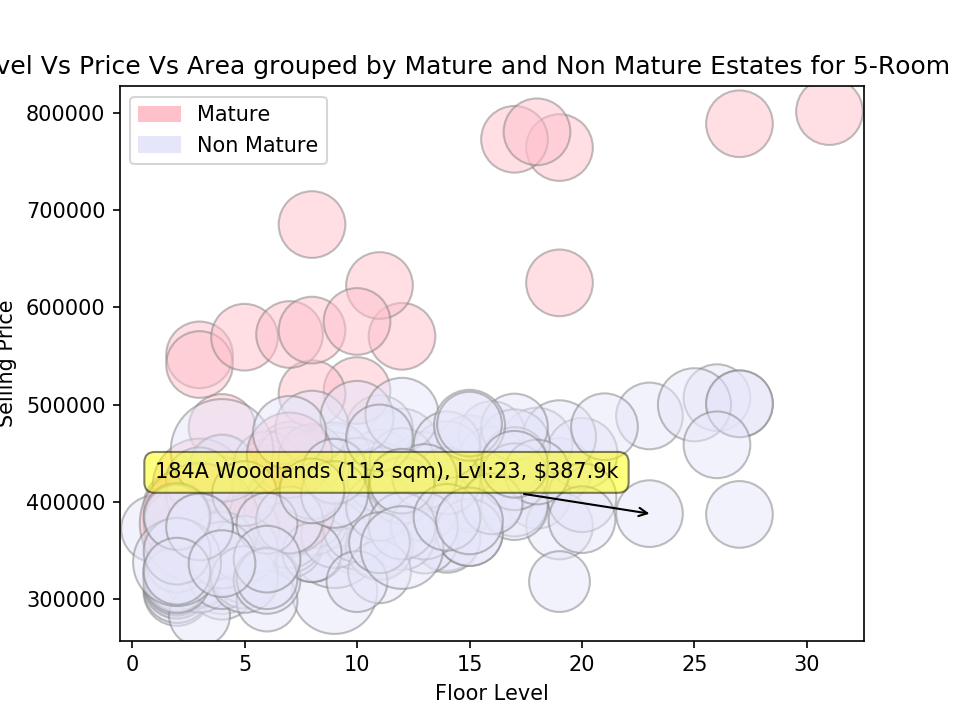

In [10]:
# Bubble plot on 5-Room Flats
## Sqm for Mature and Non Mature
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import os
#import mpld3
import mplcursors
os.getcwd()
# TO get a boxplot to see the number of 5-Room flats available for Nov 2018 Sale of balance flats

unitDetails = parseUnitDetails.getUnitDetails()



# Get selling prices across towns for 5-Room flats    
#print(amkPrice)
#print(bdPrice)
#data = [amkPrice,bdPrice,bbPrice,bmPrice,bpPrice,cckPrice,clPrice,glPrice,hgPrice,jePrice,jwPrice
#       ,kwnPrice,prcPrice,pgPrice,qtPrice,sbPrice,skPrice,sgnPrice,tapPrice,tpPrice,wlPrice,ysPrice]
labels = np.array(['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun'])
#print(data)
#print(len(data))
#print(len(labels))


########## short cut for the above rb 
allTowns = ['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun']



########################################################

## Mature and Non Mature estates pass in csv file
#yMature = estates that are mature
#nMature = estates that are non mature
yMature,nMature,keys,values = parseUnitDetails.getMaturityColour()
##########################################################################
# Making Dictionary for colours and by town
# change fill color
region_color_dict = {
"Mature": "pink",
"Non Mature": "lavender",      
}

town_region_dict= dict(zip(keys,values))  #### dict used this way diff

##############################################################################

# Bubble plot on 5-Room Flats
## Sqm for Mature and Non Mature
town5rm =[] 
price5rm=[]
sqm5=[]
lvl5 =[]

labelKeyList = []
labelStrList = []
sqm =unitDetails['sqm']

for unit in unitDetails:
    if unit['rmType']=='5-Room':
        town5rm.append(unit['town'])
        price5rm.append(unit['sellingPrice'])
        sqm5.append(unit['sqm'])   
        lvl5.append(unit['level'])
        # labelKeyStr may have dupes if more than 1 unit has the same lvl and same selling price
        # display time to check all
        labelKeyStr = "%i_%i" % (unit['level'], unit['sellingPrice'])
        labelStr = "%s %s (%i sqm)" % (unit['blk'], unit['town'], unit['sqm'])
        labelKeyList.append(labelKeyStr)
        labelStrList.append(labelStr)
        
townColouring = [region_color_dict[town_region_dict[town]] for town in town5rm]
#print(len(lvl5),len(price5rm),len(sqm5),len(townColouring))
makeAreaLarger = [np.exp(x/16.3) for x in sqm5]
#print(makeAreaLarger)

fig = plt.figure()
ax = plt.axes()
# Change color with c and alpha. I map the color to the X axis value.
scatter = plt.scatter(lvl5, price5rm, s=makeAreaLarger,c=townColouring, cmap="Blues", alpha=0.5, edgecolors="grey") # should scale size


# Add titles (main and on axis)
plt.xlabel("Floor Level")
plt.ylabel("Selling Price")
plt.title("Level Vs Price Vs Area grouped by Mature and Non Mature Estates for 5-Room Flats")
# Add Labels using mpatches library
pink_patch = mpatches.Patch(color='pink', label='Mature')
lavender_patch = mpatches.Patch(color='lavender', label='Non Mature')
plt.legend(handles=[pink_patch,lavender_patch])



def labelOnHover(sel):
    dataX,dataY = sel.target
    #txtToShow = "%i, %i" % (dataX, dataY)
    labelKeyStr = "%i_%i" % (dataX, dataY)
    countOfKey = labelKeyList.count(labelKeyStr)
    #labelTxt = ''
    
    #for this version, use only the first value
    # TODO: update to reflect all details
    
    keyIdx = labelKeyList.index(labelKeyStr)
    labelTxt = labelStrList[keyIdx]
    
    #txtToShow = "Lvl:%i, $%1.1fk count: %i, label: %s" % (dataX, int(dataY)/1000, countOfKey, labelTxt)
    txtToShow = "%s, Lvl:%i, $%1.1fk" % (labelTxt, dataX, int(dataY)/1000)
    
    sel.annotation.set_text(txtToShow)
    #return('hover lblKeyStr ', labelKeyStr, ' count ', countOfKey)
    
    #return sel.annotation.set_text(txtToShow)

#def dummy():
#    labelKeyStr = "%i_%i" % (34, 650000)
#    countOfKey = labelKeyList.count(labelKeyStr)
#    print('hover lblKeyStr: ', labelKeyStr, ' count: ', countOfKey)
#    
#dummy()
    
mplcursors.cursor(ax, hover=True).connect("add", labelOnHover)


#mplcursors.cursor(hover=True) # this code just show the x/y values

plt.show()








#https://python-graph-gallery.com/272-map-a-color-to-bubble-plot/



In [15]:
# Find out which has the overall lowest price
minprice = min(unitDetails['sellingPrice'])
for unit in unitDetails:
    if unit['sellingPrice']==minprice and unit['rmType']=='4-Room':
        print('4-Rm',unit['blk'])
        print('4-Rm',unit['town'])
                                            
    if unit['sellingPrice']==minprice and unit['rmType']=='5-Room':
        print('5-Rm',unit['blk'])
        print('5-Rm',unit['town'])                                               
print(minprice)


# MinPrice for 4-Room and 5-Room separately
for unit in unitDetails:
    for unit['rmType']=='4-Room':
        pass


4-Rm 327
4-Rm Woodlands
216000
